In [1]:
#Import packages

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

In [2]:
dt=sns.load_dataset('iris')

In [3]:
dt.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
dt.shape

(150, 5)

In [6]:
dt.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
dt.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
dt.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
dt.describe(include='object')

,species
count,150
unique,3
top,setosa
freq,50


<AxesSubplot:>

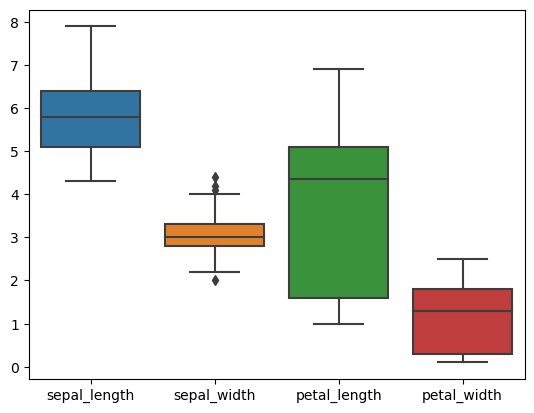

In [14]:
sns.boxplot(data=dt)

QR ,Zscore  ,valeur abérante

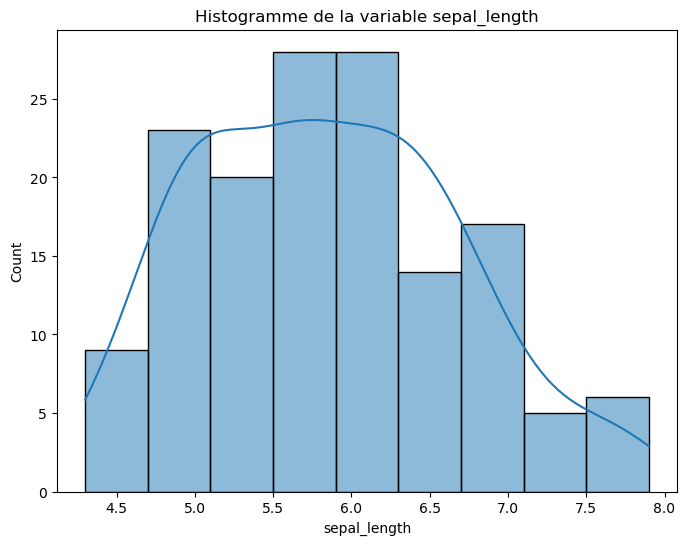

La variable sepal_length suit une loi normale (p-value=0.05682424941067306)


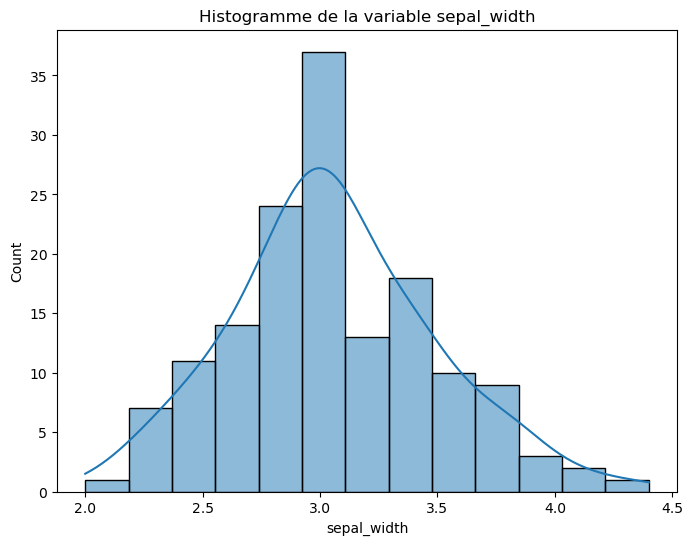

La variable sepal_width suit une loi normale (p-value=0.2097338099298262)


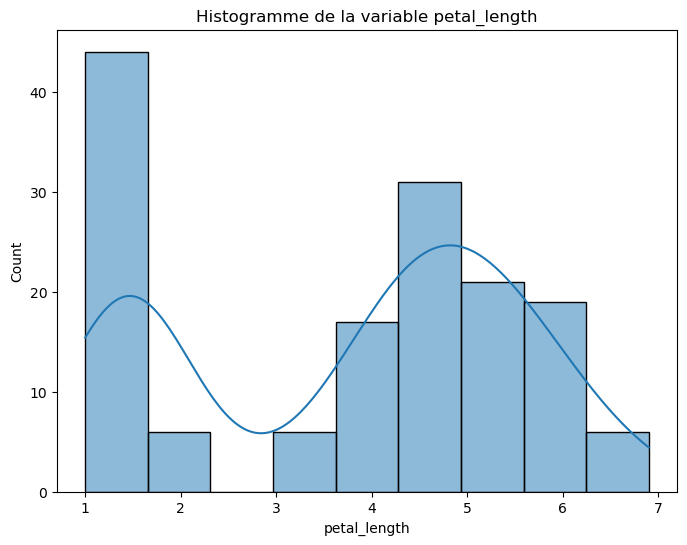

La variable petal_length ne suit pas une loi normale (p-value=7.264667501338673e-49)


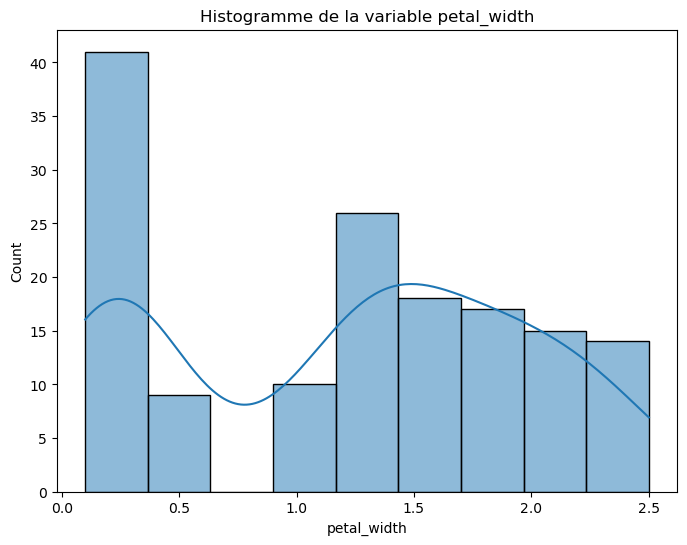

La variable petal_width ne suit pas une loi normale (p-value=1.3492785927137586e-30)


In [18]:
# Analyse de la normalité
df=dt

# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(df[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")

In [28]:
# Analyse de la variable qualitative

sns.countplot(x=df['variety'])

KeyError: 'variety'

In [29]:
# Création d'un tableau de fréquences pour la variable "species"
freq_table = (df['variety'].value_counts())/len(df)

freq_table

#Création d'un diagramme circulaire pour le tableua de fréquence


plt.pie(freq_table,labels=freq_table.index)

KeyError: 'variety'

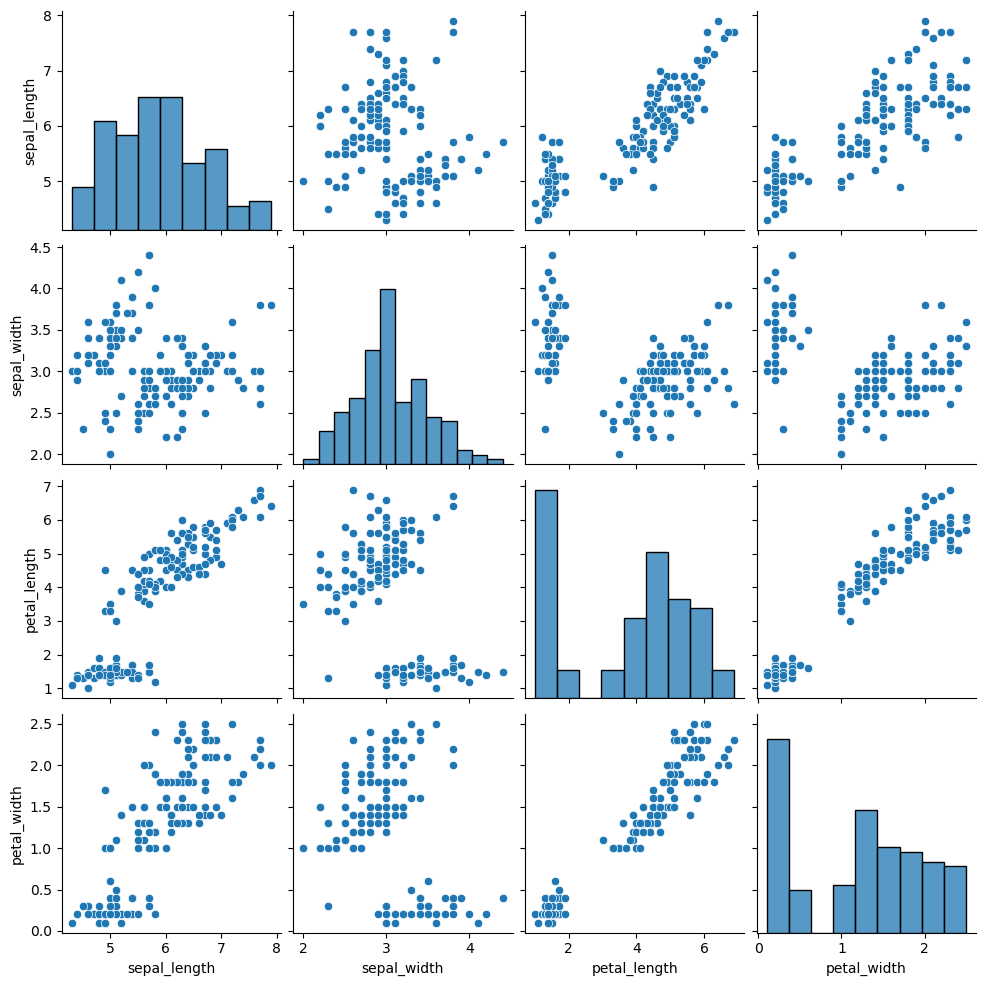

In [30]:
sns.pairplot(df)

In [32]:
# Obtenir le tableau de corélation et la heatmap
corr_matrix=df.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

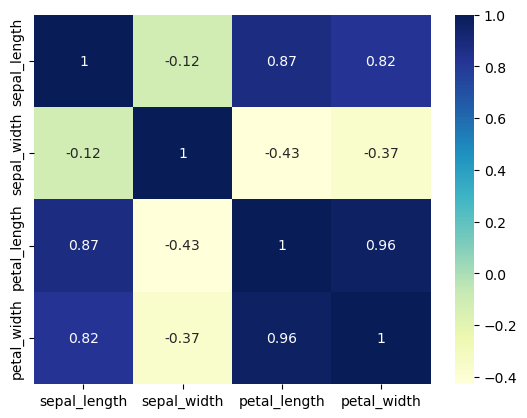

In [35]:

# Calcul des p-values pour chaque paire de variables
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")

KeyError: 'sepal_lenght'

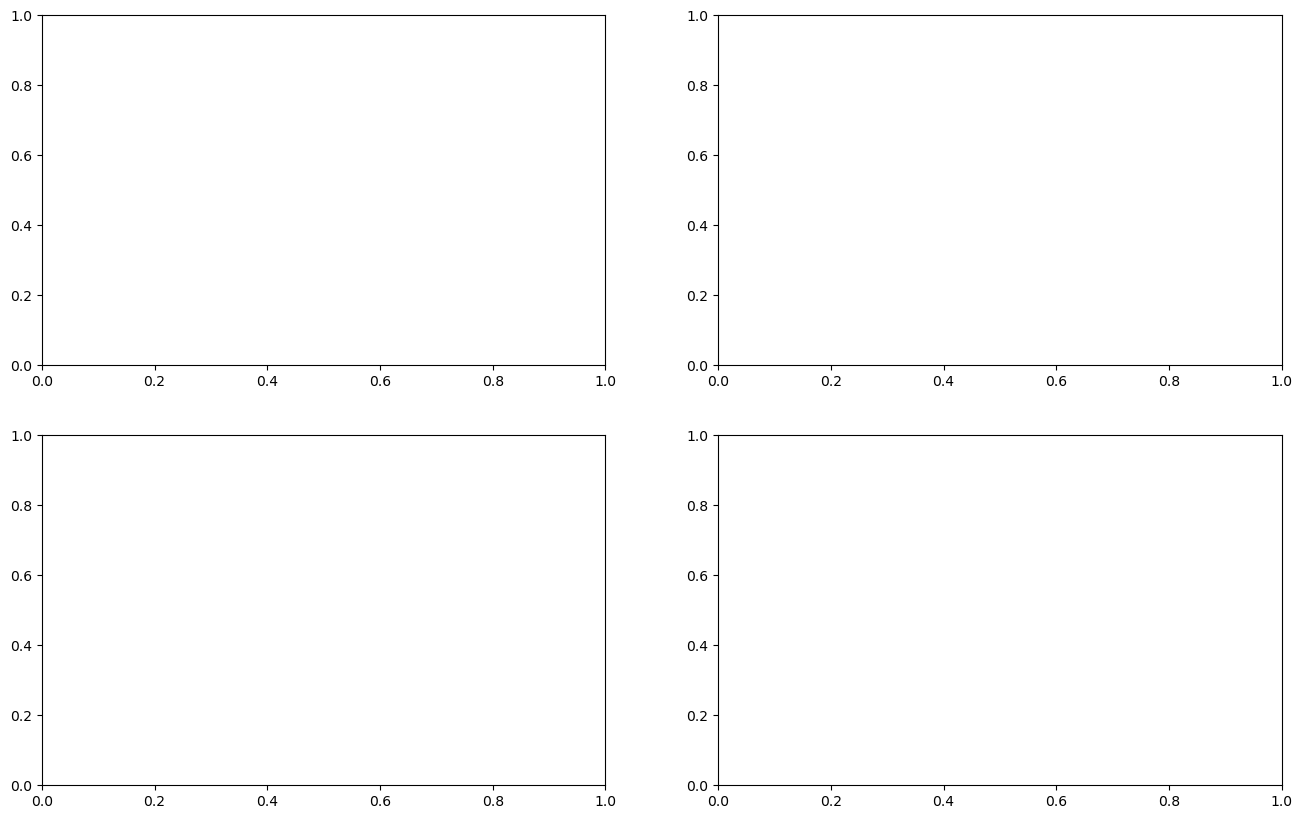

In [38]:
#Analyse des relations entre les variables et la variété de fleur

# Création des boxplots pour chaque variable en fonction de l'espèce de la fleur
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['variety'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

